In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
import sys
import os
import glob
from collections import defaultdict, Counter
import seaborn as sns

In [2]:
# Ghazi lower bound paperU

#1. Upper bound on sample size
log_squared = lambda x: np.log2(x)*np.log2(x)
loglog = lambda x: np.log2(np.log2(x))

def small_sample_regime(B):
    
    return log_squared(B)*loglog(B)

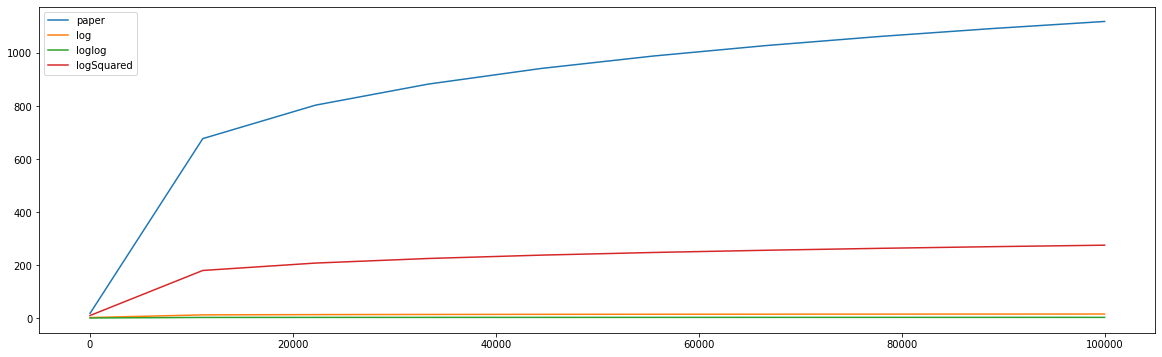

In [25]:
Bs = np.linspace(10, 10**5, 10)
arr = []
linear = []
loglogArr = []
logSqauredArr = []
logArr = []
for _b in Bs:
    b = int(_b)
    arr.append(small_sample_regime(b))
    linear.append(b)
    loglogArr.append(loglog(b))
    logSqauredArr.append(log_squared(b))
    logArr.append(np.log2(b))
    
df = pd.DataFrame([arr,
                   logArr,
                   loglogArr,
                   logSqauredArr,
#                   linear
                  ],
                  index=['paper', 
                          'log',
                          'loglog',
                          'logSquared',
#                           'linear'
                        ]).T
df.index = Bs
ax = df.plot(figsize=(20,6), fontsize=17)

# ax.set_yscale('log')
# ax.set_xscale('log')

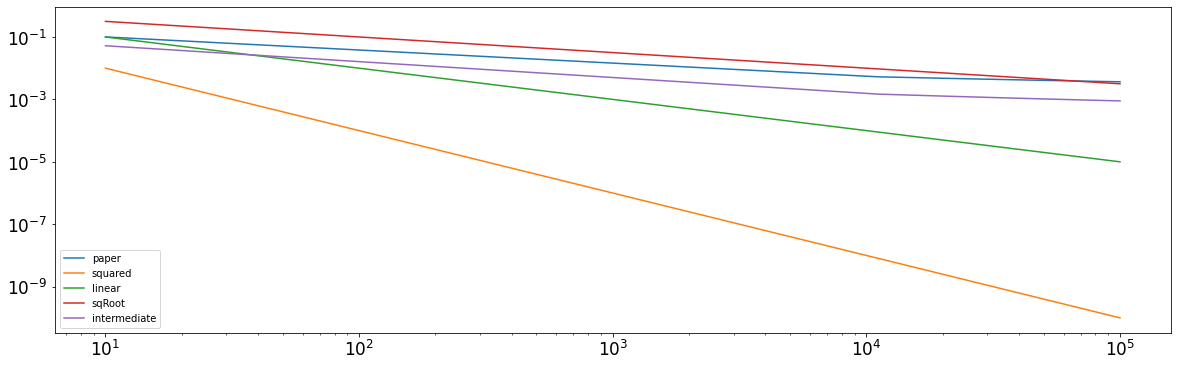

In [38]:
def error_small_sample(B):
    
    denominator = loglog(B)**2*np.log2(B)
    return 1/denominator

def intermediate(B):
    
    n = log_squared(B)*loglog(B)
    
    denominator = n**(3/4)*(np.log2(n))**(1/4)
    return 1/n


Bs = np.linspace(10, 10**5, 10)
arr = {}
sqArr = {}
linearArr = {}
sqRarr = {}
intermed = {}
for _b in Bs:
    b = int(_b)
    arr[b] = error_small_sample(b)
    sqArr[b] = 1/(b**2)
    linearArr[b] = 1/b
    sqRarr[b] = 1/np.sqrt(b)
    intermed[b] = intermediate(b)
df = pd.DataFrame([arr,
                  sqArr,
                  linearArr,
                  sqRarr,
                  intermed 
                  ],
                  index=['paper', 
                         'squared',
                         'linear',
                         'sqRoot',
                         'intermediate'
                        ]).T
ax = df.plot(figsize=(20,6), fontsize=17)
ax.set_yscale('log')
ax.set_xscale('log')